#**Tutorial 8: Comparing Satellite Products with in situ-Based Data**

> Indented block

> Indented block




**Week 1, Day 3, Remote Sensing**

**Content creators:** Douglas Rao

**Content reviewers:** TBD

**Content editors:** TBD

**Production editors:** TBD

**Our 2023 Sponsors:** TBD

#**Tutorial Objectives**

In this tutorial, you will learn how to use observations from stations over land to evaluate satellite climate data. 

*  Learn how to access the gridded climate data derived from station observations from AWS.
*  Learn how to convert monthly total values to daily rate.
*  Learn how to correctly compare satellite and observation-based data for evalution.


#**Setup**



In this section, we have:


1.   **Import cell:** imports all libraries you use in the tutorial.
2.   **Hidden Figure settings cell:** sets up the plotting style (copy exactly)
1.   **Hidden Plotting functions cell:** contains all functions used to create plots throughout the tutorial (so students don't waste time looking at boilerplate matplotlib but can here if they wish to). Please use only matplotlib for plotting for consistency.
2.   **Hidden Helper functions cell:** This should contain functions that students have previously used or that are very simple. Any helper functions that are being used for the first time and are important should be placed directly above the relevant text or exercise (see Section 1.1 for an example).
    



In [1]:
#Imports

# Import only the libraries/objects that you use in this tutorial. 

# If any external library has to be installed, !pip install library --quiet
# follow this order: numpy>matplotlib. 
# import widgets in hidden Figure settings cell

!pip install s3fs --quiet

# Properly install cartopy in colab to avoid session crash
!apt-get install libproj-dev proj-data proj-bin --quiet
!apt-get install libgeos-dev --quiet
!pip install cython --quiet
!pip install cartopy --quiet

!apt-get -qq install python-cartopy python3-cartopy  --quiet
!pip uninstall -y shapely  --quiet
!pip install shapely --no-binary shapely  --quiet

import s3fs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 8.6 MB/s eta 0:00:00
Reading package lists...
Building dependency tree...
Reading state information...
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
proj-data is already the newest version (7.2.1-1~focal0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 170 kB of archives.
After this operation, 485 kB of additional disk space will be used.
Get:1 http://ppa.laun

In [2]:
# @title Figure settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")


#**Section 1: Evaluating Satellite Data with Observations**



In [ ]:
# @title Video 1: Video 1 Name 
#Tech team will add code to format and display the video

Satellite data is often evaluated against the observations that are considered reliable to assess its quality. Station-based observations and derived data are often considered good reference. For ocean data, we often use measurements made by ships, buoys, drifters, or gliders as the reference to assess the quality of satellite data.

In this tutorial, we uses nClimGrid data, a gridded climate dataset produced by NOAA that provides daily and monthly temperature and precipitation data using all available station observations. This dataset is only available for the United States. We choose this dataset because it is available publicly on the AWS. You can explore other station data to evaluate the satellite data in the project.

## **Section 1.1: Accesing nClimGrid - a station based gridded climate data**

The nClimGrid-monthly dataset is a gridded dataset derived from spatially interpolating data from the Global Historical Climatology Network (GHCN). The dataset includes monthly precipitation, monthly temperature average, monthly temperature maximum and monthly temperature minimum.  The dataset provides monthly values in a approximate 5x5 km lat/lon grid for the Continental United States. Data is available from 1895 to the present via NOAA NCEI or AWS. We will be accessing the data via AWS directly.


In [3]:
# Connect to the AWS S3 bucket for the nClimGrid Monthly Precipitation data
fs = s3fs.S3FileSystem(anon=True)
# Read in the monthly precipitation data from nClimGrid on AWS
url = 's3://noaa-nclimgrid-monthly-pds/nclimgrid_prcp.nc'
file_ob = fs.open(url)
ds = xr.open_dataset(file_ob)
ds

<xarray.Dataset>
Dimensions:  (time: 1539, lat: 596, lon: 1385)
Coordinates:
  * time     (time) datetime64[ns] 1895-01-01 1895-02-01 ... 2023-03-01
  * lat      (lat) float32 49.35 49.31 49.27 49.23 ... 24.69 24.65 24.6 24.56
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
Data variables:
    prcp     (time, lat, lon) float32 ...
Attributes: (12/14)
    date_created:              2023-01-06 09:27:45.962383
    date_modified:             2023-01-06 09:27:45.962559
    Conventions:               CF-1.6, ACDD-1.3
    ncei_template_version:     NCEI_NetCDF_Grid_Template_v2.0
    title:                     nClimGrid
    naming_authority:          gov.noaa.ncei
    ...                        ...
    geospatial_lat_min:        24.562532
    geospatial_lat_max:        49.3542
    geospatial_lon_min:        -124.6875
    geospatial_lon_max:        -67.020836
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east

We can see that the nClimGrid dataset is available from `1895-01-01` until present. Since our GPCP data is only available between `1979-01-01` and `2022-12-01`. We extract only the data for that time period from the nClimGrid monthly data.

In [4]:
prcp_obs = ds.sel(time=slice('1979-01-01', '2022-12-31'))
prcp_obs

<xarray.Dataset>
Dimensions:  (time: 528, lat: 596, lon: 1385)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float32 49.35 49.31 49.27 49.23 ... 24.69 24.65 24.6 24.56
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
Data variables:
    prcp     (time, lat, lon) float32 ...
Attributes: (12/14)
    date_created:              2023-01-06 09:27:45.962383
    date_modified:             2023-01-06 09:27:45.962559
    Conventions:               CF-1.6, ACDD-1.3
    ncei_template_version:     NCEI_NetCDF_Grid_Template_v2.0
    title:                     nClimGrid
    naming_authority:          gov.noaa.ncei
    ...                        ...
    geospatial_lat_min:        24.562532
    geospatial_lat_max:        49.3542
    geospatial_lon_min:        -124.6875
    geospatial_lon_max:        -67.020836
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east

From the information about the precipitation data from nClimGird monthly dataset, we know it is the monthly total precipitation, which is the total amount of rainfall that a location receives for the entire month with the unit of `millimeter`.

In [5]:
prcp_obs.prcp

<xarray.DataArray 'prcp' (time: 528, lat: 596, lon: 1385)>
[435842880 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float32 49.35 49.31 49.27 49.23 ... 24.69 24.65 24.6 24.56
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02
Attributes:
    least_significant_digit:  3
    references:               GHCN-Monthly Version 3 (Vose et al. 2011), NCEI...
    long_name:                Precipitation, monthly total
    standard_name:            precipitation_amount
    units:                    millimeter
    valid_min:                0.0
    valid_max:                2000.0

For the GPCP precipitation data, it is the daily precipitation rate with the unit of `mm/day`. That quantifies on average in the month the amount of precipitation in a day for a given location. So we need to do some conversion for the precipitation amount from nClimGrid.

To convert total amount to precipitation rate, we just need to divide the amount by the number of days within a month (e.g., 31 days for January). We can use `.days_in_month` to achieve that.

In [6]:
# Calculate precipitation rate from nClimGrid
obs_rate = prcp_obs.prcp/prcp_obs.time.dt.days_in_month
obs_rate

<xarray.DataArray (time: 528, lat: 596, lon: 1385)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float32 49.35 49.31 49.27 49.23 ... 24.69 24.65 24.6 24.56
  * lon      (lon) float32 -124.7 -124.6 -124.6 -124.6 ... -67.1 -67.06 -67.02

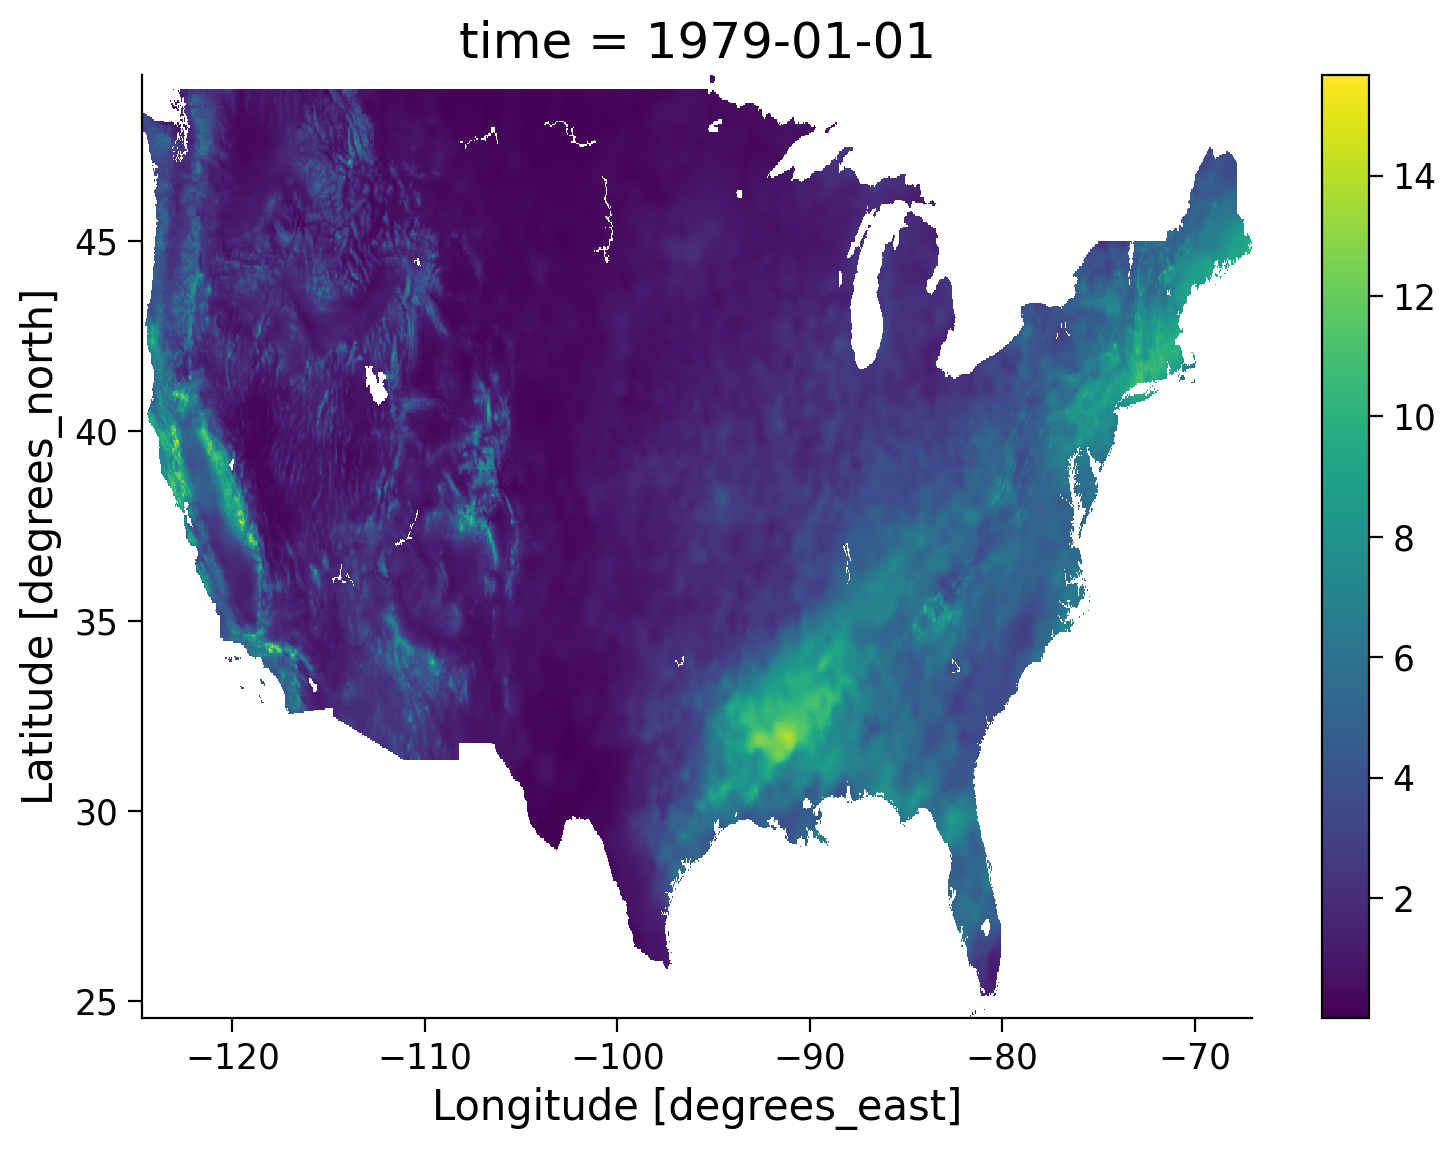

In [7]:
# Generate the map of precipitation rate from nClimGrid monthly data
obs_rate[0].plot()

In this quick map, we can see the value range of the precipitation rate appears to be on par (reasonably) comparing to the GPCP motnhly precipitation CDR data (0-20 mm/day). This is the basis for our comparison - make sure the satellite data and observations are describing the same quantity.

## **Section 1.2: Read GPCP Monthly Precipitation Data**

In this comparison, let's read in the monthly GPCP data again from AWS public data catalog.

In [8]:
# Get the list of all data files in the AWS S3 bucket
file_pattern = 'noaa-cdr-precip-gpcp-monthly-pds/data/*/gpcp_v02r03_monthly_*.nc'
file_location = fs.glob(file_pattern)

# Open connection to all data files
file_ob = [fs.open(file) for file in file_location]
# Open all the monthly data files and concatenate them along the time dimension.
# This process will take ~ 1 minute to complete due to the number of data files.   
ds_gpcp = xr.open_mfdataset(file_ob, combine='nested', concat_dim='time') 

In [9]:
# Get the GPCP precipitation rate
prcp_sat = ds_gpcp.precip
prcp_sat

<xarray.DataArray 'precip' (time: 529, latitude: 72, longitude: 144)>
dask.array<concatenate, shape=(529, 72, 144), dtype=float32, chunksize=(1, 72, 144), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * longitude  (longitude) float32 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2023-01-01
Attributes:
    long_name:      NOAA Climate Data Record (CDR) of GPCP Monthly Satellite-...
    standard_name:  precipitation amount
    units:          mm/day
    valid_range:    [  0. 100.]
    cell_methods:   area: mean time: mean

## **Section 1.3: Spatial Pattern**

Now, let's take a quick look at the spatial pattern between these two datasets for a selected month (e.g., 1979-01-01).

/usr/local/lib/python3.9/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


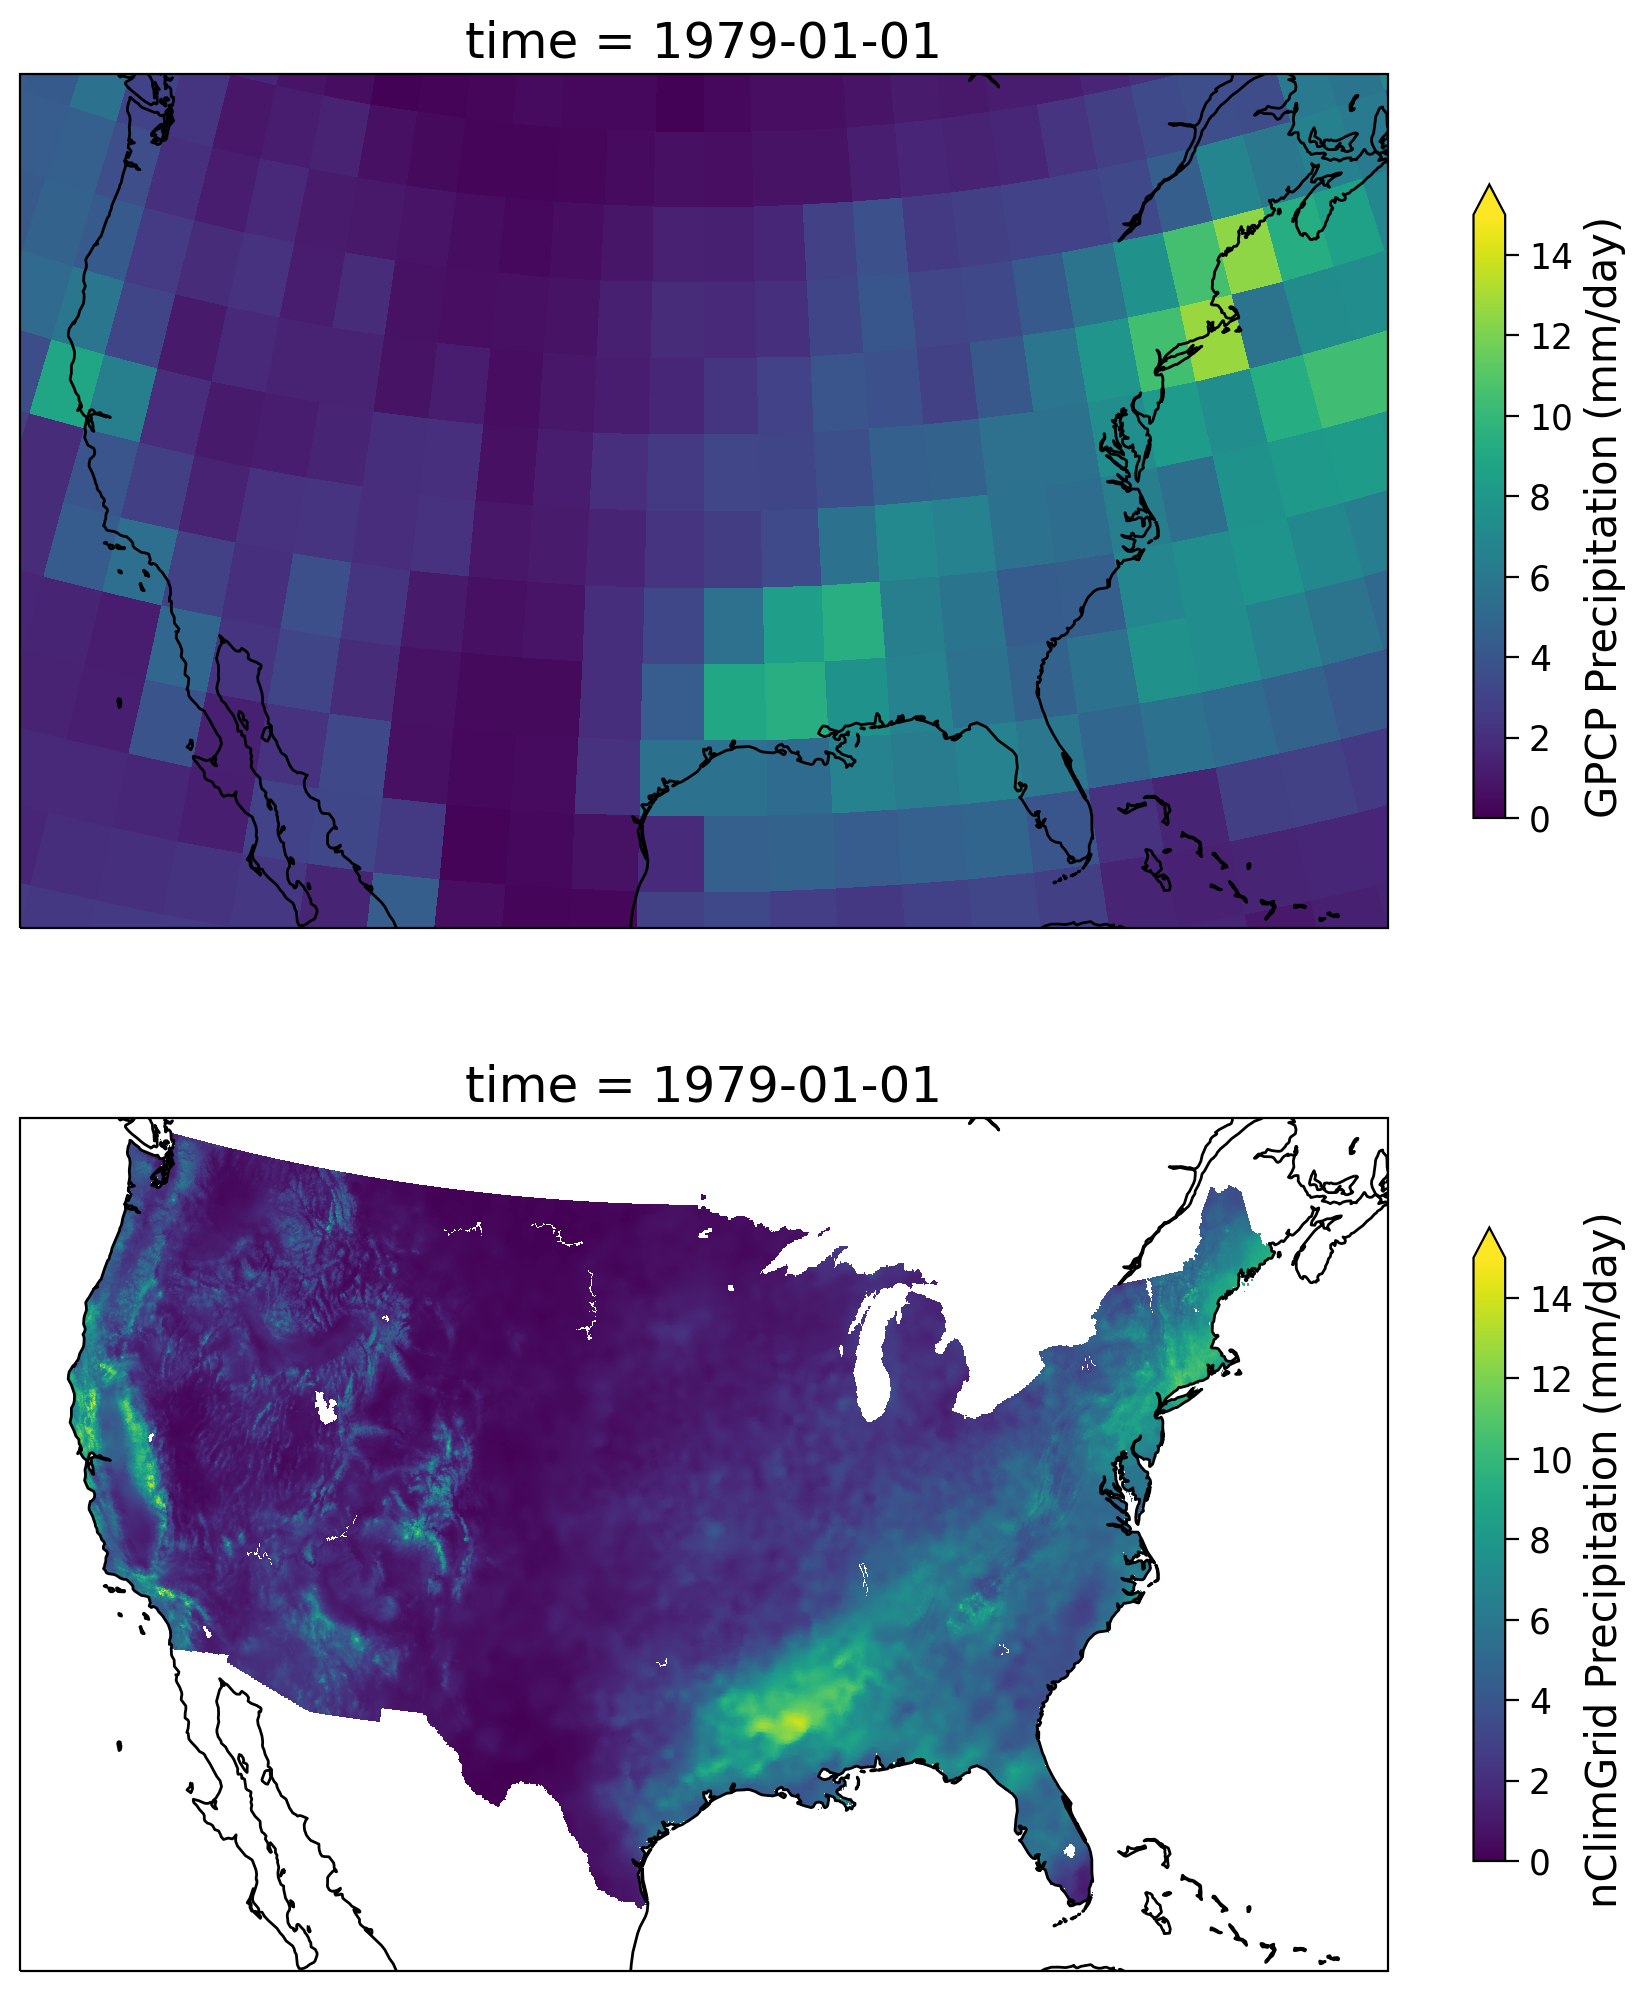

In [10]:
# Set up the geographical region for continental US
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 21, 50]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# Extract sat and obs data for the month of 1979-01-01
sat = prcp_sat.sel(time='1979-01-01')
obs = obs_rate.sel(time='1979-01-01')

# Initate plot for North America using two suplots
fig,axs = plt.subplots(2, subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)},
                       figsize=(9,12), sharex=True, sharey=True)
axs[0].set_extent(extent)
axs[0].coastlines()
axs[0].set_title('GPCP Monthly')
sat.plot(ax=axs[0], transform=ccrs.PlateCarree(),
         vmin = 0, vmax = 15,
         cbar_kwargs=dict(shrink=0.5, label='GPCP Precipitation (mm/day)'))
axs[1].set_extent(extent)
axs[1].coastlines()
axs[1].set_title('nClimGrid Monthly')
obs.plot(ax=axs[1], transform=ccrs.PlateCarree(),
         vmin = 0, vmax = 15,
         cbar_kwargs=dict(shrink=0.5, label='nClimGrid Precipitation (mm/day)'))


Overall, we have a similar spatial pattern but with widely different spatial resolution (e.g., 5km v.s. 2.5°). 

## **Section 1.4: Time series comparison**

Let's use New York City as an example, we can examine the time series of the satellite and observation-based dataset to evaluate the performance.

The latitute and longitute of NYC is `(40.71°N, 74.01°W)`. We will use it to extract the time series from GPCP and nClimGrid.

In [11]:
# Note that GPCP data is stored as 0-360 degree for the longitude, so the longitude should be using (360 - lon)
sat = prcp_sat.sel(longitude=285.99, latitude=40.71, method='nearest')
obs = obs_rate.sel(lon=-74.01, lat=40.71, method='nearest') #precipitation rate
obs_total = prcp_obs.sel(lon=-74.01, lat=40.71, method='nearest') #total amount

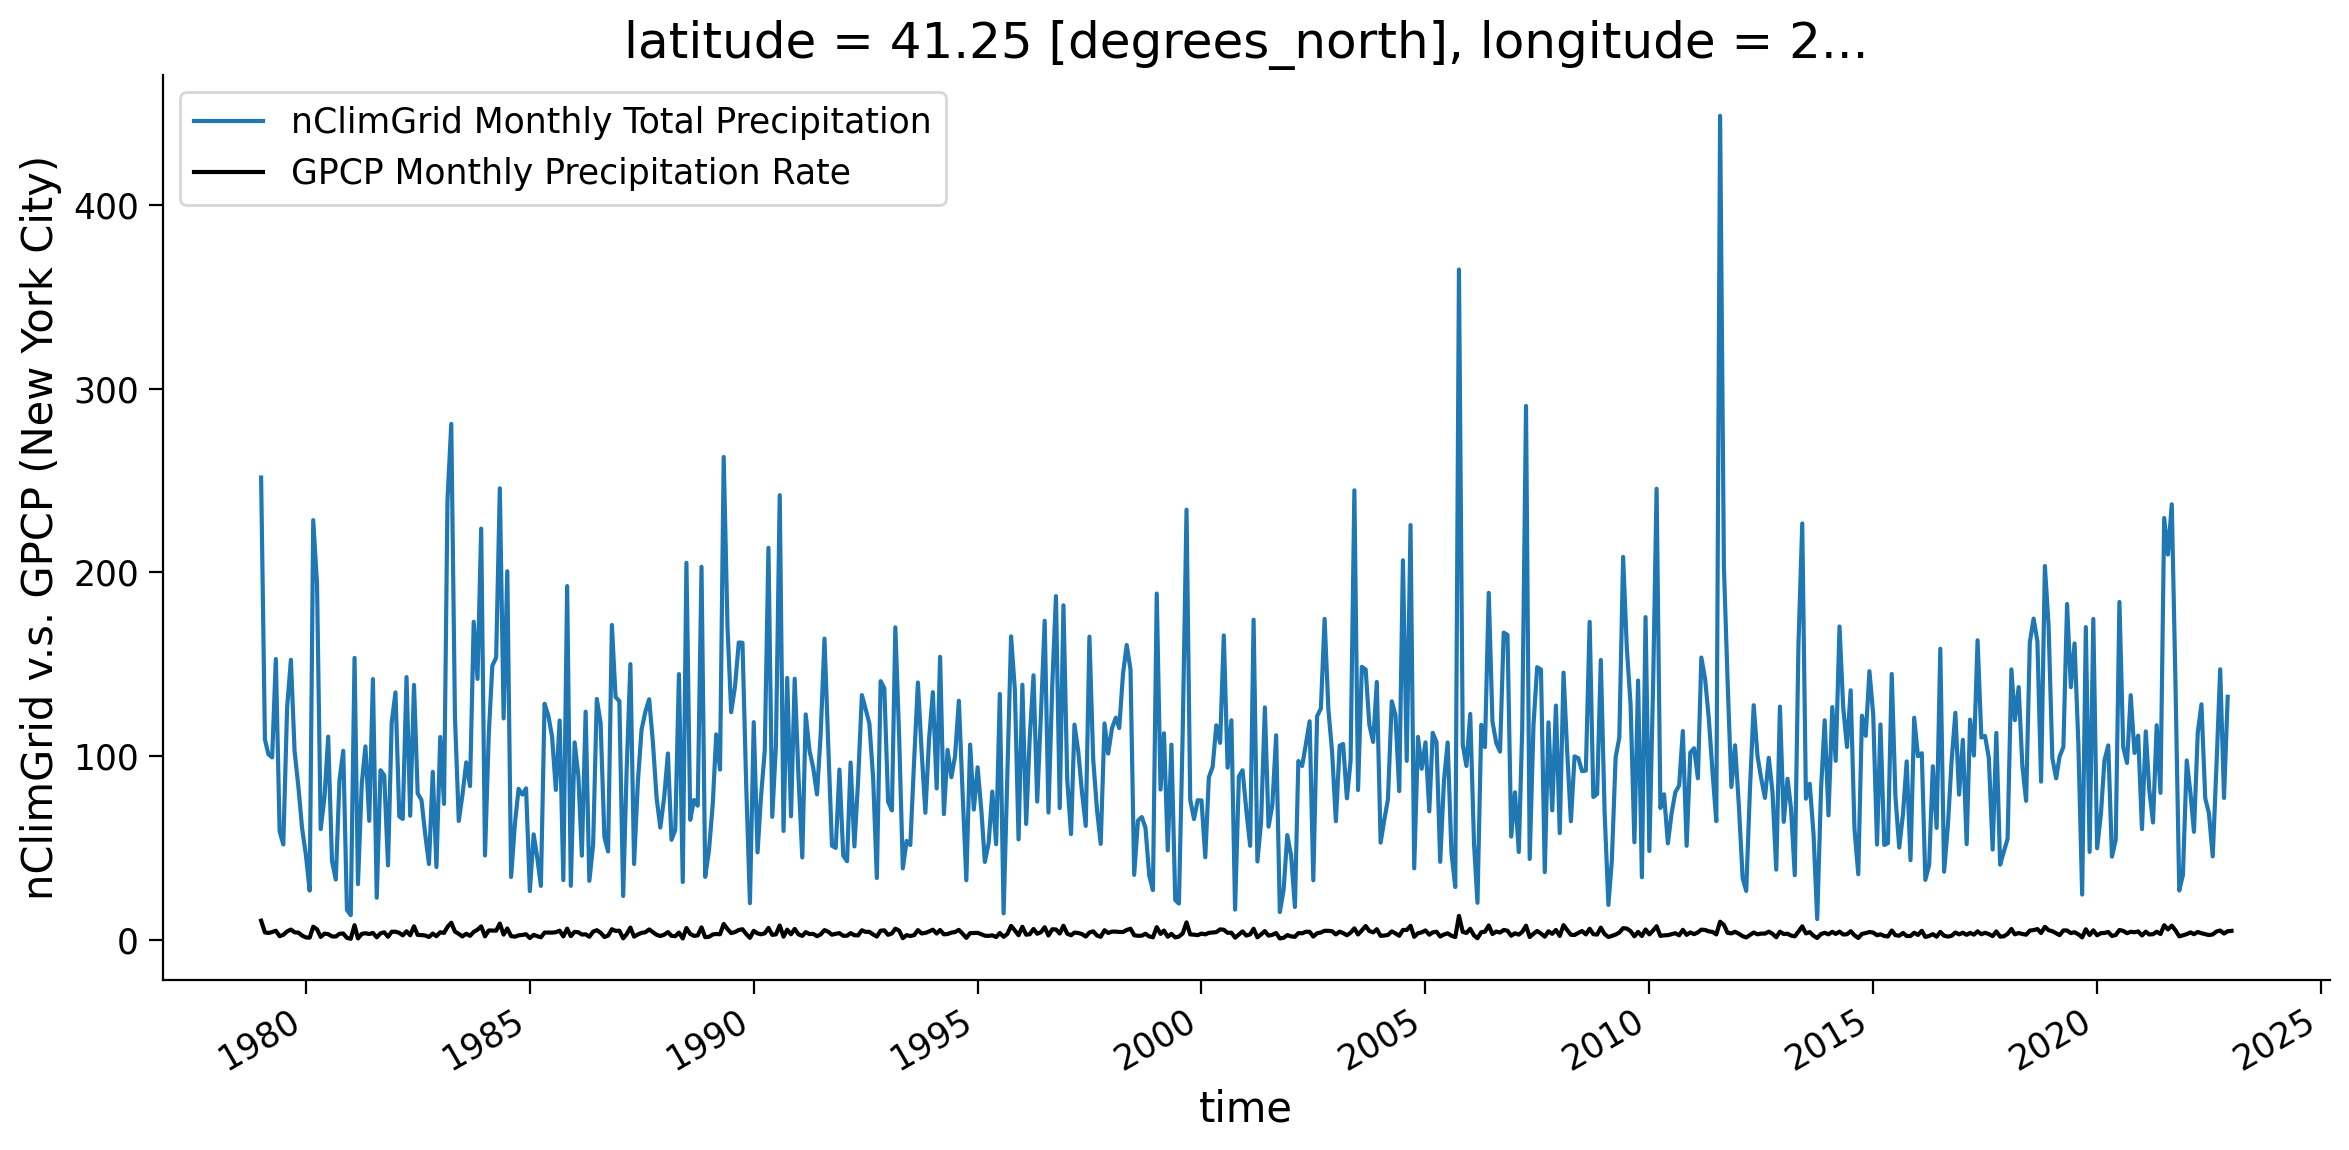

In [12]:
# Let's first look at the comparison between the total amount from nClimGrid
fig = plt.figure(figsize=(12,6))
obs_total.prcp.plot(label='nClimGrid Monthly Total Precipitation')
sat.plot(color='k', label='GPCP Monthly Precipitation Rate')
plt.ylabel('nClimGrid v.s. GPCP (New York City)')
plt.legend()

We clearly see the systematic shift between the total precipitation amount from nClimGrid data and the precipitation rate from GPCP. Now, let's see if the nClimGrid rate will be any better for the evaluation.

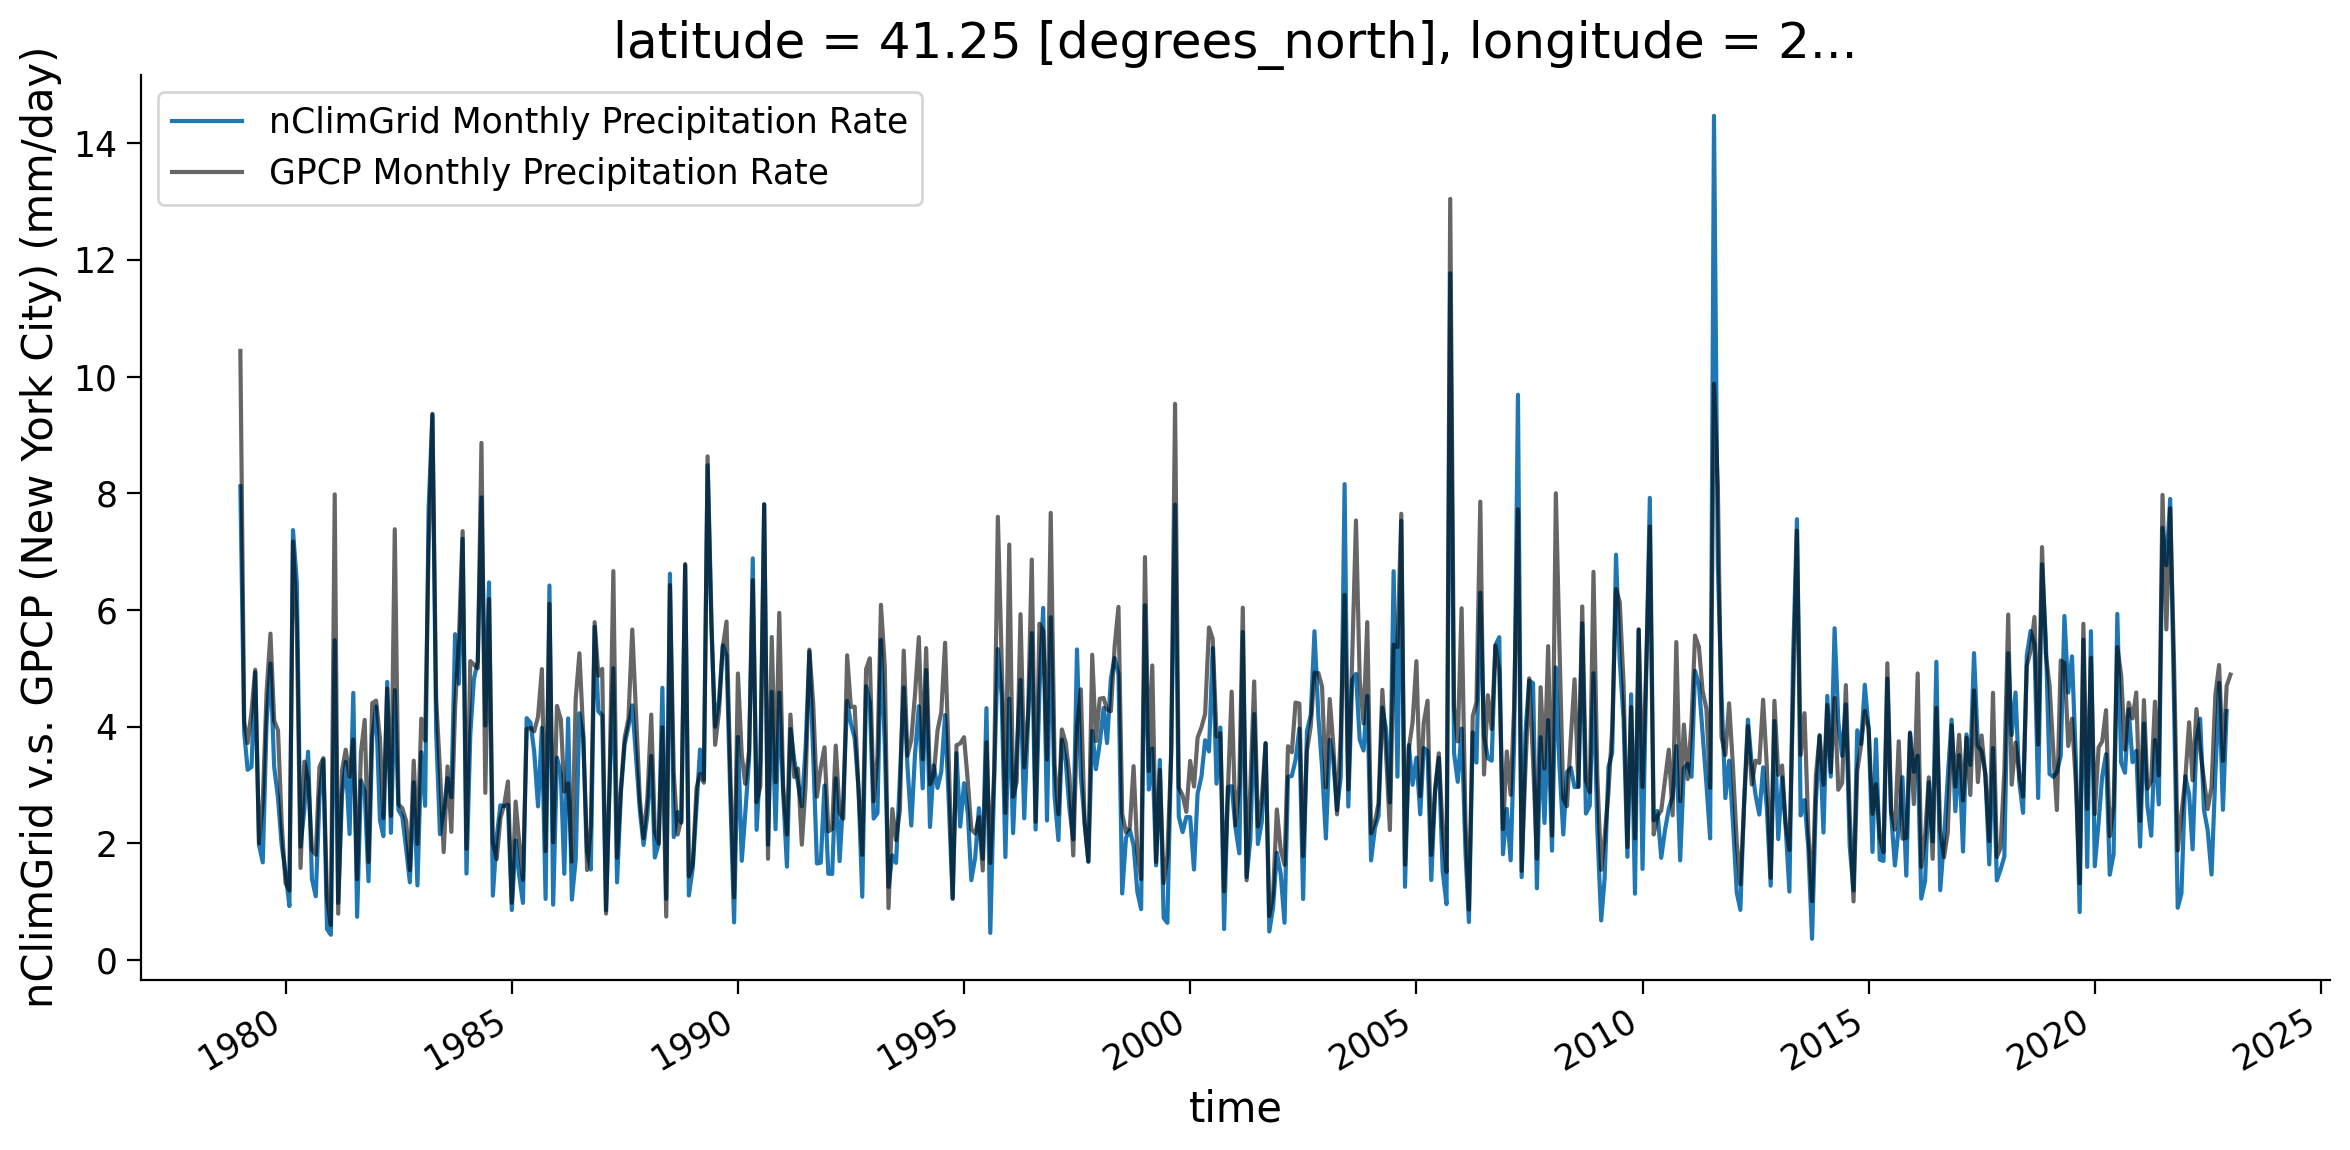

In [13]:
# Let's look at the comparison between the precipitation rate from nClimGrid
fig = plt.figure(figsize=(12,6))
obs.plot(label='nClimGrid Monthly Precipitation Rate')
sat.plot(color='k', alpha=0.6, label='GPCP Monthly Precipitation Rate')
plt.ylabel('nClimGrid v.s. GPCP (New York City) (mm/day)')
plt.legend()

The plot show much improvement between the two datasets because now we are looking at the same quantity of the precipitation rate. We are going to zoom in to a few years to see how the data compares.

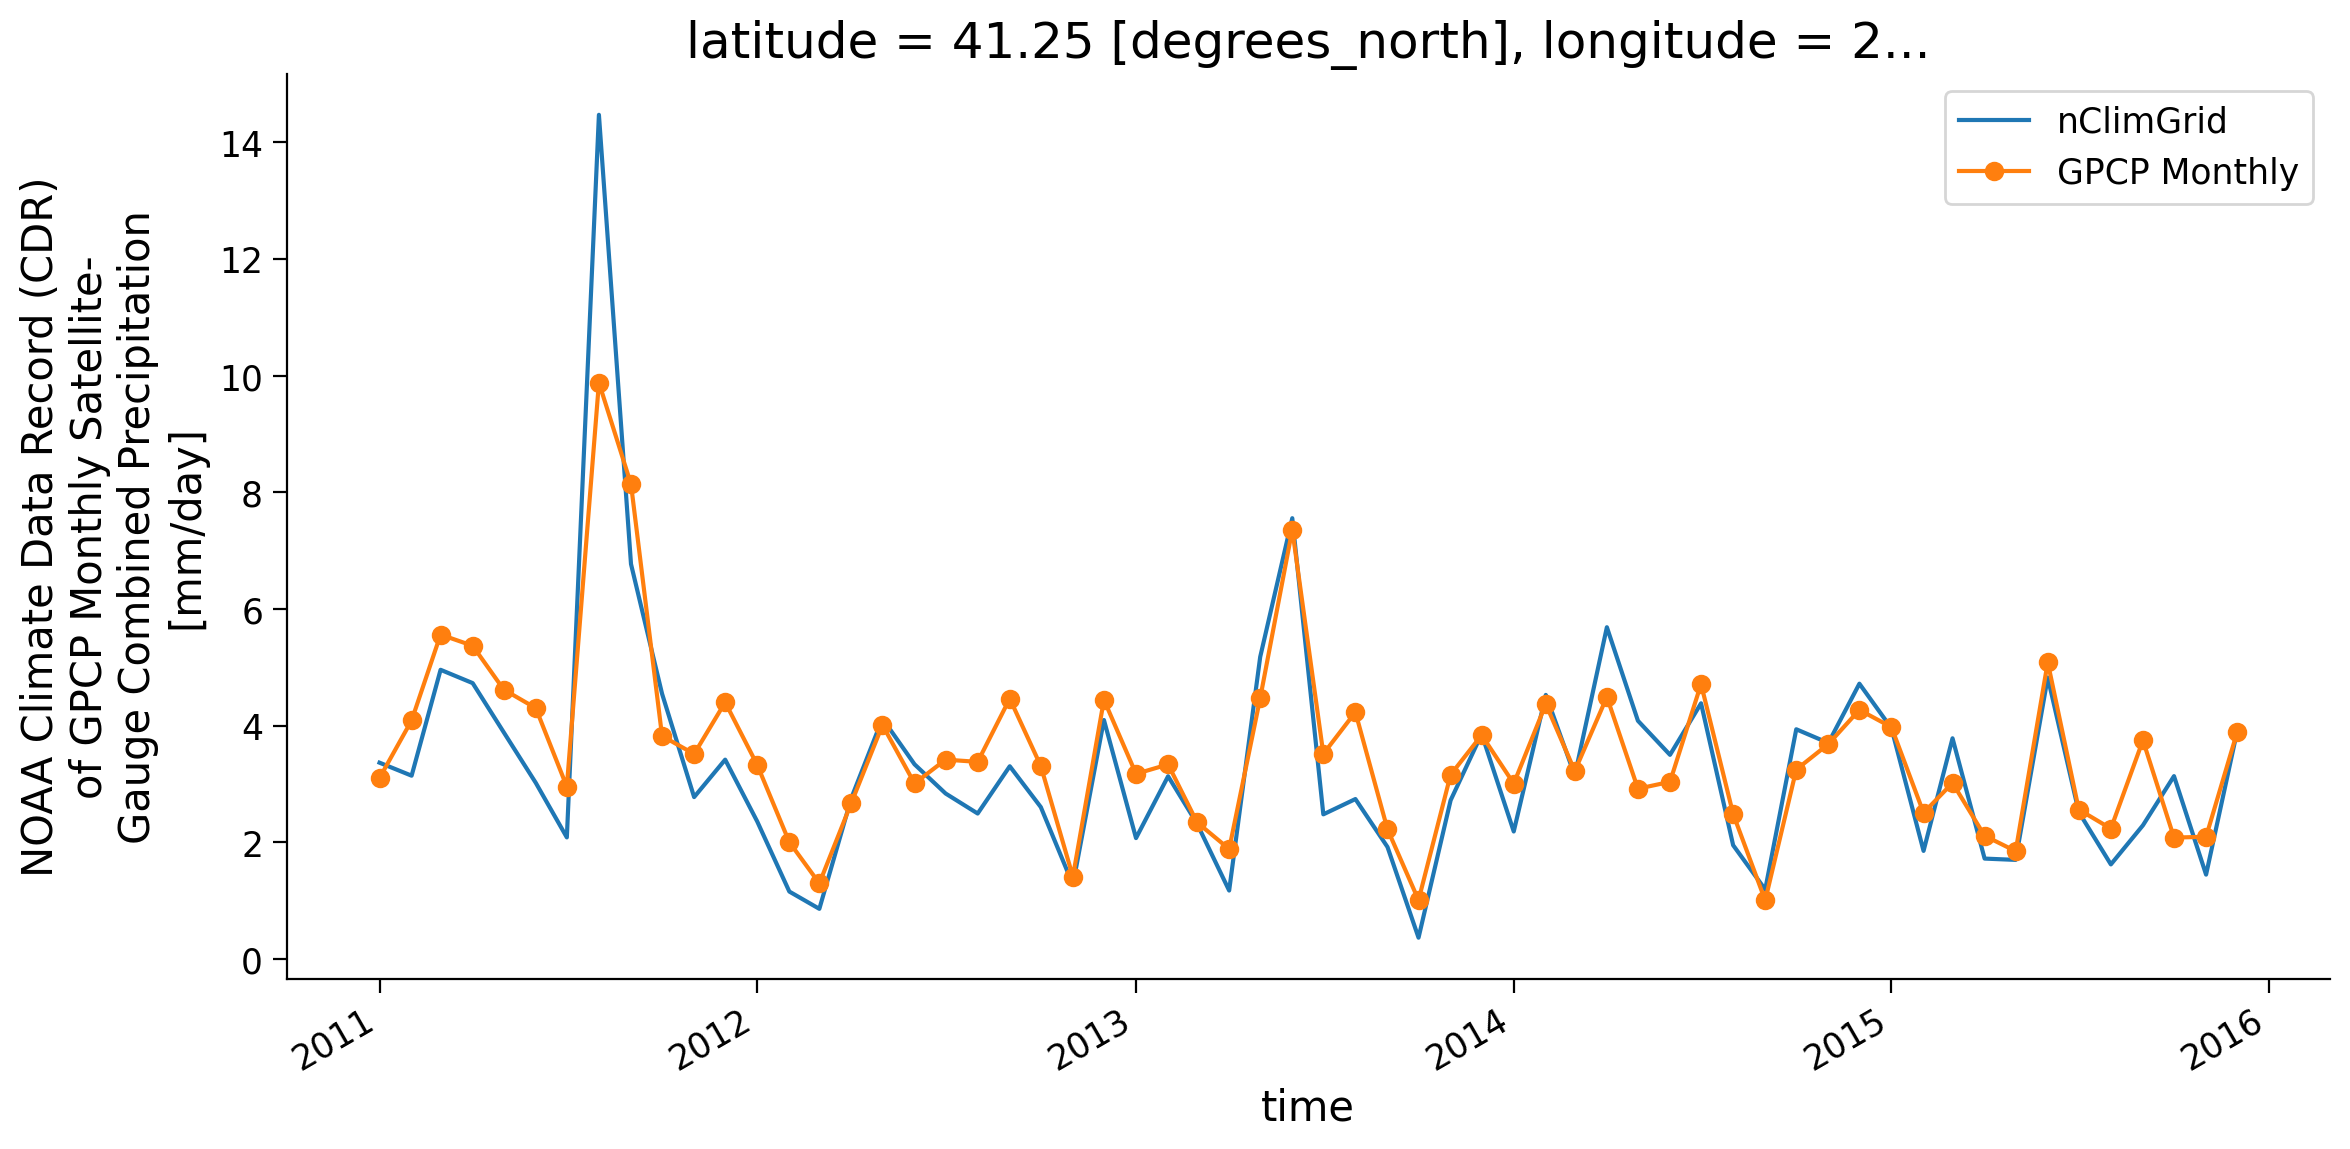

In [14]:
fig = plt.figure(figsize=(12, 6))
obs.sel(time=slice('2011-01-01', '2015-12-01')).plot(label='nClimGrid')
sat.sel(time=slice('2011-01-01', '2015-12-01')).plot(marker='o', label='GPCP Monthly')
plt.legend()

We see a great alignment in the precipitation rate between the nClimGrid and GPCP data when we look at the details in a small time window.

## **Section 1.5: Quantify the Difference**

We are not looking at the quantitative evaluation of the satellite data with observations. In the scatter plot, we would love to see it go along the 1:1 line in the plot since ideally we want the values to be exactly the same.

In [15]:
# Make sure that both observation and satellite data are for the samte time period
sat = sat.sel(time=slice('1979-01-01','2022-12-01'))
obs = obs.sel(time=slice('1979-01-01','2022-12-01'))

<ipython-input-16-ed7020b8343a>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot((0,15), (0,15), 'k-', color = 'r')


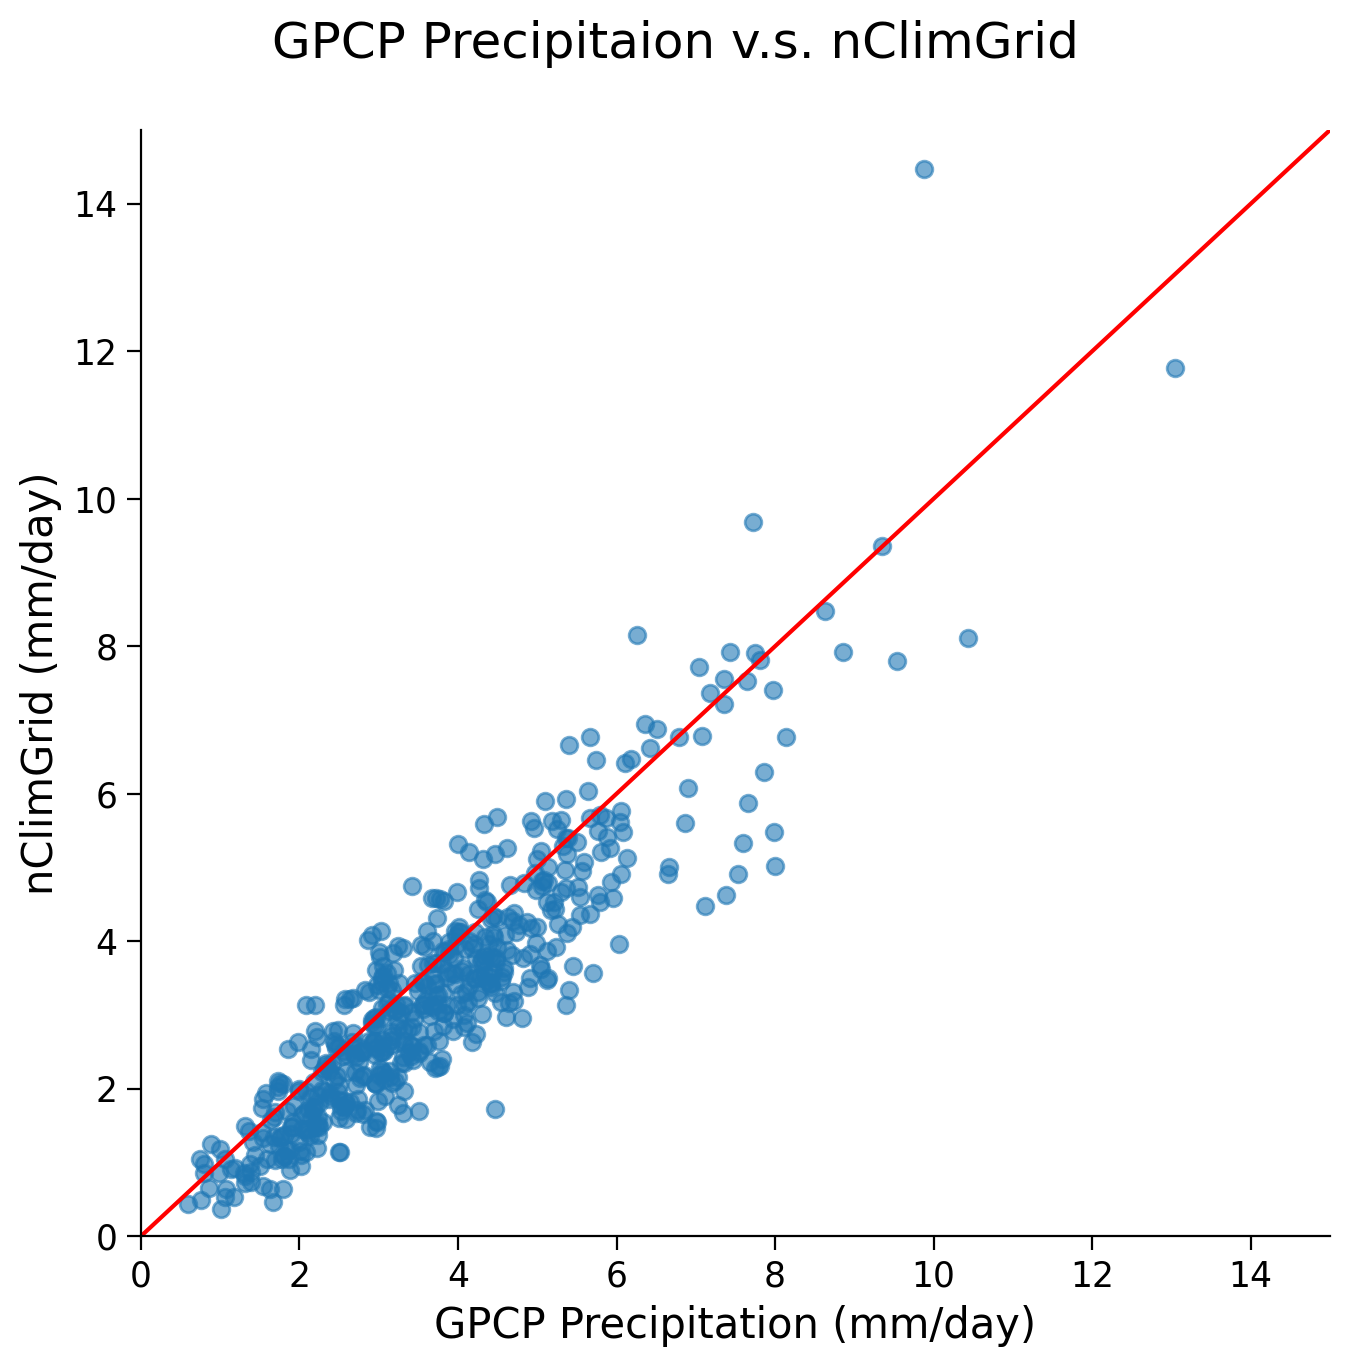

In [16]:
# Plot the scatter plot between nClimGrid and GPCP monthly precipitation CDR
fig = plt.figure(figsize=(7,7))
fig.suptitle('GPCP Precipitaion v.s. nClimGrid')
plt.scatter(sat, obs, alpha=0.6)
# Add 1:1 line
y_lim = (0,15)
x_lim = (0,15)
plt.plot((0,15), (0,15), 'k-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.xlabel('GPCP Precipitation (mm/day)')
plt.ylabel('nClimGrid (mm/day)')
plt.show()

We see a strong correlation between the satellite data and the observations for NYC. We now can also calculate the correlation between these two time series.

### **Exercise: Compare the anomaly**

For climate applications, sometimes we are more interested in the difference among the anomaly data to study the trend. So can you compare the anomaly for the time series of the NYC? 

In [ ]:
################################################################################
# Exercise: Compare the anomaly of precipitation rate for NYC.                 #
################################################################################

# Step 1: Extract time series of NYC for both GPCP and nClimGrid precipitation rate

# Step 2: Calculate climatology for the 1981-2010 period for both GPCP and 
#         nClimGrid

# Step 3: Calculate anomaly of the NYC time series for both GPCP and nClimGrid

# Step 4: Plot time series and scatter plot between two time series 

# Step 5: Calculate correlation coefficient & mean differences


'''

Please describe the relationship between the anomaly time series between two data:

'''

#**Summary**

In this tutorial, we learned how to use the station based observations in the U.S. to evalutate the satellite precipitation data. Although it is not a global comparison, the method can be applied to other station or observations that you may want to use. 

- Make sure the satellite and the observations are describing the same quantity (e.g., total precipitation amount v.s. precipitation rate).
- Comparison should be done for the same geolocation (or very close) and the same time period.
- There might be some spatial scale effect since satellite data is measuring a large area while observations maybe very narrowly focused for things that have large spatial variability. This can cause large uncertainty in the satellite data.
